In [1]:
!pip install python-dotenv

In [2]:
import os
from dotenv import load_dotenv
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# 1. Load the secret variables from your .env file
load_dotenv()
api_key = os.getenv('CMC_API_KEY')

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}

# 2. Use the variable 'api_key' here instead of the actual secret string
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key,
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2025-12-28T05:26:10.787Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 8911}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12507, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [4]:
import pandas as pd

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)      

In [5]:
# Normalize the data and make it into a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12507,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.996815e+07,1.996815e+07,False,1.749183e+12,NaN,1,NaN,NaN,None,2025-12-28T05:24:00.000Z,87598.653507,1.392636e+10,-57.6516,-0.150492,0.225634,-0.572182,-4.225131,-22.510716,-21.510689,1.749183e+12,58.9472,1.839572e+12,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510
1,1027,Ethereum,ETH,ethereum,11311,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206950e+08,1.206950e+08,True,3.542358e+11,NaN,2,NaN,NaN,None,2025-12-28T05:24:00.000Z,2934.967395,7.525666e+09,-47.5360,-0.287074,0.279973,-1.363071,-2.909849,-27.088581,-28.513742,3.542358e+11,11.9377,3.542358e+11,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510
2,825,Tether USDt,USDT,tether,164336,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.868268e+11,1.888515e+11,True,1.887114e+11,NaN,3,NaN,NaN,None,2025-12-28T05:24:00.000Z,0.999258,4.078629e+10,-39.1803,0.001118,-0.002920,-0.042859,-0.065255,-0.096324,-0.098260,1.866882e+11,6.2914,1.887114e+11,None,2025-12-28T05:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-27 21:26:27.608510
3,1839,BNB,BNB,bnb,3028,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377347e+08,1.377347e+08,1.377347e+08,False,1.160048e+11,NaN,4,NaN,NaN,None,2025-12-28T05:25:00.000Z,842.233187,1.533403e+09,-1.8392,-0.087086,0.887349,-0.834815,-5.970573,-24.185861,-16.619765,1.160048e+11,3.9093,1.160048e+11,None,2025-12-28T05:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510
4,52,XRP,XRP,xrp,1775,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.057294e+10,9.998574e+10,False,1.873973e+11,NaN,5,NaN,NaN,None,2025-12-28T05:24:00.000Z,1.874240,1.026062e+09,-44.7099,-0.046051,1.542048,-2.686250,-14.740096,-28.446161,-34.382310,1.135282e+11,3.8259,1.874240e+11,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510


In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': api_key,
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    # --- 1. Process New Data ---
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    
    # --- 2. Append to Global DataFrame (for visualization in Notebook) ---
    df = pd.concat([df, df2], ignore_index=True)
    
    # --- 3. Save to CSV (for permanent storage) ---
    # This uses the "Mac-Safe" relative path
    file_path = 'API.csv'
    
    if not os.path.isfile(file_path):
        df2.to_csv(file_path, index=False)
    else:
        # We append only the NEW data (df2), not the whole big list
        df2.to_csv(file_path, mode='a', index=False, header=False)
        
    print("Runner Done: Data appended to df and saved to API.csv")

In [7]:
import os
from time import time
from time import sleep

# Runs it only once first to make sure it works without freezing notebook
for i in range(1):
    api_runner()
    print('API Runner completed successfully')
    sleep(1) # sleep for 1 second for testing

    from IPython.display import clear_output

    for i in range(333):
        api_runner()
        # This clears the output of the cell before printing the next update
        clear_output(wait=True) 
    
        print(f'Run {i+1} completed successfully.')
        display(df.tail(5)) # Shows only the newest 5 rows added
    
        sleep(60)


Run 1 completed successfully.


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
40,1831,Bitcoin Cash,BCH,bitcoin-cash,1108,2017-07-23T00:00:00.000Z,"[mineable, pow, sha-256, marketplace, medium-o...",2.100000e+07,1.997294e+07,1.997294e+07,False,1.228721e+10,NaN,11,NaN,NaN,None,2025-12-28T05:24:00.000Z,615.192838,3.509386e+08,3.0899,-0.060919,2.227460,2.761012,15.569234,8.895515,10.377279,1.228721e+10,0.4141,1.291905e+10,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:33.831358
41,32196,Hyperliquid,HYPE,hyperliquid,219,2024-07-15T10:14:50.000Z,"[decentralized-exchange-dex-token, defi, deriv...",9.616715e+08,3.393476e+08,9.616715e+08,False,2.507154e+10,NaN,12,333931719.0,8.705866e+09,None,2025-12-28T05:24:00.000Z,26.070796,1.058048e+08,-25.7838,-0.534524,0.923489,8.652949,-26.094219,-46.301167,-44.227230,8.847063e+09,0.2981,2.507154e+10,None,2025-12-28T05:24:00.000Z,32196.0,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-12-27 21:26:33.831358
42,1975,Chainlink,LINK,chainlink,2174,2017-09-20T00:00:00.000Z,"[platform, cosmos-ecosystem, defi, interoperab...",1.000000e+09,7.081000e+08,1.000000e+09,False,1.245258e+10,NaN,13,NaN,NaN,None,2025-12-28T05:25:00.000Z,12.452579,2.283009e+08,-15.1722,-0.371265,2.204354,-0.664569,-6.207959,-30.283463,-41.478311,8.817671e+09,0.2972,1.245258e+10,None,2025-12-28T05:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-12-27 21:26:33.831358
43,1437,Zcash,ZEC,zcash,557,2016-10-29T00:00:00.000Z,"[mineable, pow, equihash, medium-of-exchange, ...",2.100000e+07,1.645849e+07,1.645849e+07,False,8.512562e+09,NaN,14,NaN,NaN,None,2025-12-28T05:24:00.000Z,517.214051,8.962229e+08,68.2321,-0.120785,10.608696,15.658419,9.767695,62.011829,694.725721,8.512562e+09,0.2869,1.086150e+10,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:33.831358
44,328,Monero,XMR,monero,347,2014-05-21T00:00:00.000Z,"[mineable, pow, medium-of-exchange, privacy, r...",NaN,1.844674e+07,1.844674e+07,True,8.431494e+09,NaN,15,NaN,NaN,None,2025-12-28T05:24:00.000Z,457.072181,1.035241e+08,16.3006,-0.133709,2.650620,-1.727683,12.371465,35.721668,59.371935,8.431494e+09,0.2841,8.431494e+09,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:33.831358


KeyboardInterrupt: 

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12507,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.996815e+07,1.996815e+07,False,1.749183e+12,NaN,1,NaN,NaN,None,2025-12-28T05:24:00.000Z,87598.653507,1.392636e+10,-57.6516,-0.150492,0.225634,-0.572182,-4.225131,-22.510716,-21.510689,1.749183e+12,58.9472,1.839572e+12,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510
1,1027,Ethereum,ETH,ethereum,11311,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206950e+08,1.206950e+08,True,3.542358e+11,NaN,2,NaN,NaN,None,2025-12-28T05:24:00.000Z,2934.967395,7.525666e+09,-47.5360,-0.287074,0.279973,-1.363071,-2.909849,-27.088581,-28.513742,3.542358e+11,11.9377,3.542358e+11,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510
2,825,Tether USDt,USDT,tether,164336,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.868268e+11,1.888515e+11,True,1.887114e+11,NaN,3,NaN,NaN,None,2025-12-28T05:24:00.000Z,0.999258,4.078629e+10,-39.1803,0.001118,-0.002920,-0.042859,-0.065255,-0.096324,-0.098260,1.866882e+11,6.2914,1.887114e+11,None,2025-12-28T05:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-27 21:26:27.608510
3,1839,BNB,BNB,bnb,3028,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377347e+08,1.377347e+08,1.377347e+08,False,1.160048e+11,NaN,4,NaN,NaN,None,2025-12-28T05:25:00.000Z,842.233187,1.533403e+09,-1.8392,-0.087086,0.887349,-0.834815,-5.970573,-24.185861,-16.619765,1.160048e+11,3.9093,1.160048e+11,None,2025-12-28T05:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510
4,52,XRP,XRP,xrp,1775,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.057294e+10,9.998574e+10,False,1.873973e+11,NaN,5,NaN,NaN,None,2025-12-28T05:24:00.000Z,1.874240,1.026062e+09,-44.7099,-0.046051,1.542048,-2.686250,-14.740096,-28.446161,-34.382310,1.135282e+11,3.8259,1.874240e+11,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1831,Bitcoin Cash,BCH,bitcoin-cash,1108,2017-07-23T00:00:00.000Z,"[mineable, pow, sha-256, marketplace, medium-o...",2.100000e+07,1.997294e+07,1.997294e+07,False,1.228721e+10,NaN,11,NaN,NaN,None,2025-12-28T05:24:00.000Z,615.192838,3.509386e+08,3.0899,-0.060919,2.227460,2.761012,15.569234,8.895515,10.377279,1.228721e+10,0.4141,1.291905e+10,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:33.831358
41,32196,Hyperliquid,HYPE,hyperliquid,219,2024-07-15T10:14:50.000Z,"[decentralized-exchange-dex-token, defi, deriv...",9.616715e+08,3.393476e+08,9.616715e+08,False,2.507154e+10,NaN,12,333931719.0,8.705866e+09,None,2025-12-28T05:24:00.000Z,26.070796,1.058048e+08,-25.7838,-0.534524,0.923489,8.652949,-26.094219,-46.301167,-44.227230,8.847063e+09,0.2981,2.507154e+10,None,2025-12-28T05:24:00.000Z,32196.0,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-12-27 21:26:33.831358
42,1975,Chainlink,LINK,chainlink,2174,2017-09-20T00:00:00.000Z,"[platform, cosmos-ecosystem, defi, interoperab...",1.000000e+09,7.081000e+08,1.000000e+09,F

In [9]:
df.groupby('timestamp').count()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-12-27 21:26:27.608510,15,15,15,15,15,15,15,8,15,15,15,15,0,15,5,5,0,15,15,15,15,15,15,15,15,15,15,15,15,15,0,15,4,4,4,4,4
2025-12-27 21:26:32.605898,15,15,15,15,15,15,15,8,15,15,15,15,0,15,5,5,0,15,15,15,15,15,15,15,15,15,15,15,15,15,0,15,4,4,4,4,4
2025-12-27 21:26:33.831358,15,15,15,15,15,15,15,8,15,15,15,15,0,15,5,5,0,15,15,15,15,15,15,15,15,15,15,15,15,15,0,15,4,4,4,4,4


In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12507,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19968153.00000,19968153.00000,False,1749183315820.70996,NaN,1,NaN,NaN,None,2025-12-28T05:24:00.000Z,87598.65351,13926359925.97531,-57.65160,-0.15049,0.22563,-0.57218,-4.22513,-22.51072,-21.51069,1749183315820.71216,58.94720,1839571723645.89990,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510
1,1027,Ethereum,ETH,ethereum,11311,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120694953.33893,120694953.33893,True,354235752760.02002,NaN,2,NaN,NaN,None,2025-12-28T05:24:00.000Z,2934.96739,7525666373.66452,-47.53600,-0.28707,0.27997,-1.36307,-2.90985,-27.08858,-28.51374,354235752760.02142,11.93770,354235752760.02002,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510
2,825,Tether USDt,USDT,tether,164336,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,186826783367.90005,188851514003.41440,True,188711402375.14001,NaN,3,NaN,NaN,None,2025-12-28T05:24:00.000Z,0.99926,40786293157.07601,-39.18030,0.00112,-0.00292,-0.04286,-0.06525,-0.09632,-0.09826,186688173916.12384,6.29140,188711402375.14001,None,2025-12-28T05:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-27 21:26:27.608510
3,1839,BNB,BNB,bnb,3028,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137734736.47000,137734736.47000,137734736.47000,False,116004766111.82001,NaN,4,NaN,NaN,None,2025-12-28T05:25:00.000Z,842.23319,1533402895.54149,-1.83920,-0.08709,0.88735,-0.83482,-5.97057,-24.18586,-16.61977,116004766111.82358,3.90930,116004766111.82001,None,2025-12-28T05:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510
4,52,XRP,XRP,xrp,1775,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60572944636.00000,99985740916.00000,False,187397264845.01999,NaN,5,NaN,NaN,None,2025-12-28T05:24:00.000Z,1.87424,1026061863.72105,-44.70990,-0.04605,1.54205,-2.68625,-14.74010,-28.44616,-34.38231,113528229569.57175,3.82590,187423989789.16000,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:27.608510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1831,Bitcoin Cash,BCH,bitcoin-cash,1108,2017-07-23T00:00:00.000Z,"[mineable, pow, sha-256, marketplace, medium-o...",21000000.00000,19972943.75000,19972943.75000,False,12287211945.34000,NaN,11,NaN,NaN,None,2025-12-28T05:24:00.000Z,615.19284,350938643.05201,3.08990,-0.06092,2.22746,2.76101,15.56923,8.89552,10.37728,12287211945.34336,0.41410,12919049594.39000,None,2025-12-28T05:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-27 21:26:33.831358
41,32196,Hyperliquid,HYPE,hyperliquid,219,2024-07-15T10:14:50.000Z,"[decentralized-exchange-dex-token, defi, deriv...",961671487.86000,339347639.00000,961671487.86000,False,25071541179.83000,NaN,12,333931719.00000,8705865724.26148,None,2025-12-28T05:24:00.000Z,26.07080,105804824.47500,-25.78380,-0.53452,0.92349,8.65295,-26.09422,-46.30117,-44.22723,8847063069.73839,0.29810,25071541179.83000,None,2025-12-28T05:24:00.000Z,32196.00000,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad90

In [12]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3



,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.15049,0.22563,-0.57218,-4.22513,-22.51072,-21.51069
Ethereum,-0.28707,0.27997,-1.36307,-2.90985,-27.08858,-28.51374
Tether USDt,0.00112,-0.00292,-0.04286,-0.06525,-0.09632,-0.09826
BNB,-0.08709,0.88735,-0.83482,-5.97057,-24.18586,-16.61977
XRP,-0.04605,1.54205,-2.68625,-14.74010,-28.44616,-34.38231
USDC,-0.00485,-0.01511,-0.03675,-0.02494,-0.04142,-0.01398
Solana,-0.31704,0.61710,-1.26208,-11.79234,-36.67605,-40.87831
TRON,-0.01403,1.44387,0.00191,1.13957,-4.49253,-15.49787
Dogecoin,-0.15412,0.94401,-5.87055,-17.83372,-36.21639,-46.93315


In [13]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.15049
         quote.USD.percent_change_24h     0.22563
         quote.USD.percent_change_7d     -0.57218
         quote.USD.percent_change_30d    -4.22513
         quote.USD.percent_change_60d   -22.51072
                                           ...   
Monero   quote.USD.percent_change_24h     2.65062
         quote.USD.percent_change_7d     -1.72768
         quote.USD.percent_change_30d    12.37146
         quote.USD.percent_change_60d    35.72167
         quote.USD.percent_change_90d    59.37194
Length: 90, dtype: float64

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.15049
        quote.USD.percent_change_24h   0.22563
        quote.USD.percent_change_7d   -0.57218
        quote.USD.percent_change_30d  -4.22513
        quote.USD.percent_change_60d -22.51072
...                                        ...
Monero  quote.USD.percent_change_24h   2.65062
        quote.USD.percent_change_7d   -1.72768
        quote.USD.percent_change_30d  12.37146
        quote.USD.percent_change_60d  35.72167
        quote.USD.percent_change_90d  59.37194

[90 rows x 1 columns]

In [16]:
df5.count()

values    90
dtype: int64

In [17]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.15049
1,Bitcoin,quote.USD.percent_change_24h,0.22563
2,Bitcoin,quote.USD.percent_change_7d,-0.57218
3,Bitcoin,quote.USD.percent_change_30d,-4.22513
4,Bitcoin,quote.USD.percent_change_60d,-22.51072
...,...,...,...
85,Monero,quote.USD.percent_change_24h,2.65062
86,Monero,quote.USD.percent_change_7d,-1.72768
87,Monero,quote.USD.percent_change_30d,12.37146
88,Monero,quote.USD.percent_change_60d,35.72167


In [18]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.15049
1,Bitcoin,quote.USD.percent_change_24h,0.22563
2,Bitcoin,quote.USD.percent_change_7d,-0.57218
3,Bitcoin,quote.USD.percent_change_30d,-4.22513
4,Bitcoin,quote.USD.percent_change_60d,-22.51072
...,...,...,...
85,Monero,quote.USD.percent_change_24h,2.65062
86,Monero,quote.USD.percent_change_7d,-1.72768
87,Monero,quote.USD.percent_change_30d,12.37146
88,Monero,quote.USD.percent_change_60d,35.72167


In [20]:
df7['percent_change'] = df7['percent_change'].str[-3:]
df7['percent_change'] = df7['percent_change'].str.replace('_', '', regex=False)
df7

,name,percent_change,values
0,Bitcoin,1h,-0.15049
1,Bitcoin,24h,0.22563
2,Bitcoin,7d,-0.57218
3,Bitcoin,30d,-4.22513
4,Bitcoin,60d,-22.51072
...,...,...,...
85,Monero,24h,2.65062
86,Monero,7d,-1.72768
87,Monero,30d,12.37146
88,Monero,60d,35.72167


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

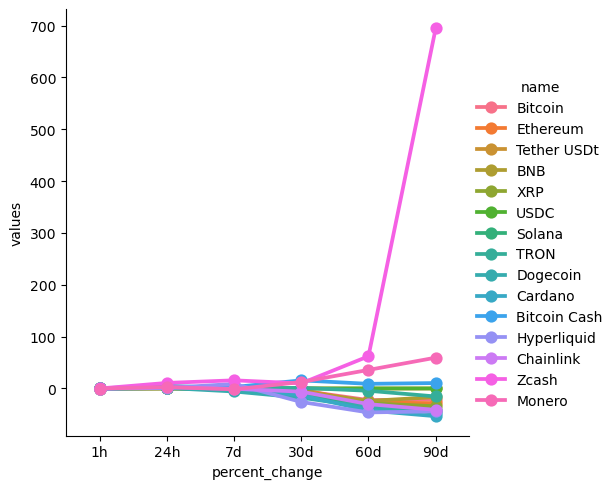

In [22]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [25]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,87598.65351,2025-12-27 21:26:27.608510
1,Ethereum,2934.96739,2025-12-27 21:26:27.608510
2,Tether USDt,0.99926,2025-12-27 21:26:27.608510
3,BNB,842.23319,2025-12-27 21:26:27.608510
4,XRP,1.87424,2025-12-27 21:26:27.608510
...,...,...,...
40,Bitcoin Cash,615.19284,2025-12-27 21:26:33.831358
41,Hyperliquid,26.07080,2025-12-27 21:26:33.831358
42,Chainlink,12.45258,2025-12-27 21:26:33.831358
43,Zcash,517.21405,2025-12-27 21:26:33.831358


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

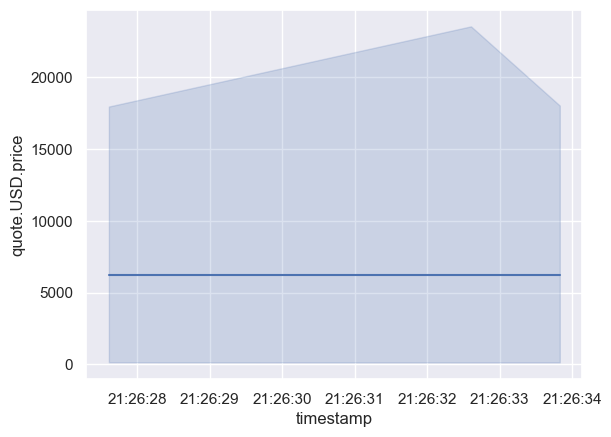

In [29]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)